In [83]:
import json
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
d = json.load(open('/Users/martina/Downloads/FoodData_Central_sr_legacy_food_json_2021-10-28.json', 'r'))

In [19]:
d.keys()

dict_keys(['SRLegacyFoods'])

legacy info https://www.ars.usda.gov/ARSUserFiles/80400525/Data/SR-Legacy/SR-Legacy_Doc.pdf

In [20]:
d['SRLegacyFoods'][0].keys()

dict_keys(['foodClass', 'description', 'foodNutrients', 'foodAttributes', 'nutrientConversionFactors', 'isHistoricalReference', 'ndbNumber', 'foodCategory', 'fdcId', 'dataType', 'inputFoods', 'publicationDate', 'foodPortions'])

In [120]:
# these are chosen searching for food i nthe interface and choosing the best option amongst the legacy
# e.g. https://fdc.nal.usda.gov/fdc-app.html#/?query=butter

l_ = ['Butter, without salt', 'Oil, canola', 'Oil, almond', 'Oil, olive, salad or cooking', 
     'Oil, avocado', 'Oil, coconut', 'Oil, palm', 
     'Lard', 'Oil, peanut, salad or cooking', 'Oil, peanut, salad or cooking',
      'Oil, sunflower, high oleic (70% and over)',
     'Shortening, vegetable, household, composite', 'Oil, flaxseed, cold pressed',
      'Oil, hazelnut', 'Oil, grapeseed', 
      'Oil, safflower, salad or cooking, high oleic (primary safflower oil of commerce)',
      'Oil, sesame, salad or cooking','Oil, walnut'
     ]

# corn oil doesn't have a good entry

In [192]:
d_data = {'name': [], 'fats_monounsaturated': [], 'fats_monounsaturated_unit': [],
         'fats_polyunsaturated': [], 'fats_polyunsaturated_unit': [], 
         'fats_saturated': [], 'fats_saturated_unit': [], 'protein': [], 'protein_unit': [],
         'water': [], 'water_unit': [], 'carbs_by_diff': [], 'carbs_by_diff_unit': [], 
         'tot_lipid': [], 'tot_lipid_unit': []}

for item in d['SRLegacyFoods']:
    for x in l_:
        if item['description'] == x:
            
            d_data['name'].append(x)
 #           print(item.keys())
            #print(item['foodNutrients'])
            for nutrient in item['foodNutrients']:
            
                if nutrient['nutrient']['name'] == 'Fatty acids, total monounsaturated':
                    d_data['fats_monounsaturated'].append(nutrient['amount'])
                    d_data['fats_monounsaturated_unit'].append(nutrient['nutrient']['unitName'])
                    
                if nutrient['nutrient']['name'] == 'Fatty acids, total polyunsaturated':
                 #   print(x, nutrient)
                    d_data['fats_polyunsaturated'].append(nutrient['amount'])
                    d_data['fats_polyunsaturated_unit'].append(nutrient['nutrient']['unitName'])
                    
                if nutrient['nutrient']['name'] == 'Fatty acids, total saturated':
                 #   print(x, nutrient)
                    d_data['fats_saturated'].append(nutrient['amount'])
                    d_data['fats_saturated_unit'].append(nutrient['nutrient']['unitName'])
                    
                if nutrient['nutrient']['name'] == 'Protein':
                 #   print(x, nutrient)
                    d_data['protein'].append(nutrient['amount'])
                    d_data['protein_unit'].append(nutrient['nutrient']['unitName'])
                    
                if nutrient['nutrient']['name'] == 'Water':
                 #   print(x, nutrient)
                    d_data['water'].append(nutrient['amount'])
                    d_data['water_unit'].append(nutrient['nutrient']['unitName'])
                
                if nutrient['nutrient']['name'] == 'Carbohydrate, by difference':
                 #   print(x, nutrient)
                    d_data['carbs_by_diff'].append(nutrient['amount'])
                    d_data['carbs_by_diff_unit'].append(nutrient['nutrient']['unitName'])
                    
                if nutrient['nutrient']['name'] == 'Total lipid (fat)':
                 #   print(x, nutrient)
                    d_data['tot_lipid'].append(nutrient['amount'])
                    d_data['tot_lipid_unit'].append(nutrient['nutrient']['unitName'])
                    
        if item['description']=='Butter, without salt':
            a = item

In [193]:
[i['nutrient']['name'] for i in item['foodNutrients']]

['Alcohol, ethyl',
 'Folic acid',
 'Caffeine',
 'Theobromine',
 'Sugars, total including NLEA',
 'Lutein + zeaxanthin',
 'Vitamin E (alpha-tocopherol)',
 'Vitamin K (Dihydrophylloquinone)',
 'Vitamin K (phylloquinone)',
 'Cryptoxanthin, beta',
 'Lycopene',
 'Retinol',
 'Carotene, beta',
 'Carotene, alpha',
 'SFA 4:0',
 'SFA 6:0',
 'PUFA 18:4',
 'MUFA 20:1',
 'MUFA 22:1',
 'SFA 8:0',
 'PUFA 22:6 n-3 (DHA)',
 'PUFA 2:5 n-3 (EPA)',
 'PUFA 22:5 n-3 (DPA)',
 'Energy',
 'Vitamin D (D2 + D3), International Units',
 'Folate, DFE',
 'Energy',
 'Vitamin D3 (cholecalciferol)',
 'Vitamin D (D2 + D3)',
 'Vitamin A, RAE',
 'Folate, food',
 'Niacin',
 'Isoleucine',
 'Leucine',
 'Lysine',
 'Cystine',
 'Valine',
 'Arginine',
 'Histidine',
 'Fatty acids, total monounsaturated',
 'Fatty acids, total polyunsaturated',
 'SFA 10:0',
 'SFA 16:0',
 'SFA 18:0',
 'MUFA 18:1',
 'PUFA 18:2',
 'PUFA 18:3',
 'PUFA 20:4',
 'Water',
 'Calcium, Ca',
 'Potassium, K',
 'Zinc, Zn',
 'Total lipid (fat)',
 'Carbohydrate, b

In [194]:
df = pd.DataFrame(d_data)

# units for what I've chosen turn out ro be always g so there  was no need

In [195]:
df[df.name.str.contains('olive')]

,name,fats_monounsaturated,fats_monounsaturated_unit,fats_polyunsaturated,fats_polyunsaturated_unit,fats_saturated,fats_saturated_unit,protein,protein_unit,water,water_unit,carbs_by_diff,carbs_by_diff_unit,tot_lipid,tot_lipid_unit
11,"Oil, olive, salad or cooking",73.0,g,10.5,g,13.8,g,0.0,g,0.0,g,0.0,g,100.0,g


In [196]:
df['sum'] = df['fats_monounsaturated'] + df['fats_polyunsaturated'] + df['fats_saturated'] + \
            df['protein'] + df['water'] + df['carbs_by_diff']

df['sum_fats'] = df['fats_monounsaturated'] + df['fats_polyunsaturated'] + df['fats_saturated'] 

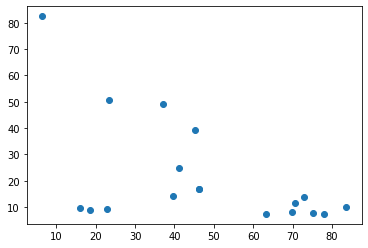

In [197]:
plt.scatter(df.fats_monounsaturated, df.fats_saturated)

In [199]:
df.to_csv('fats_nutrition.csv', index=False)